# Understanding Sonar Dataset and find the best machine learning algorithm

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
data.shape

(208, 61)

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
data[1].sum()

7.9948

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

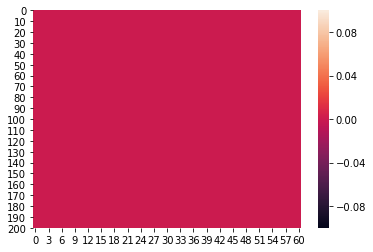

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [10]:
data[60].sum()

'RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM'

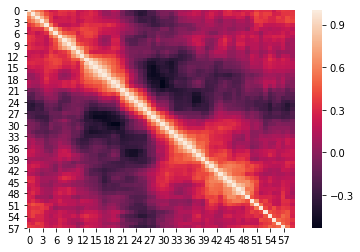

In [11]:
#sns.heatmap(data.corr(), annot=True)
sns.heatmap(data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD271C8>,
      dtype=object)

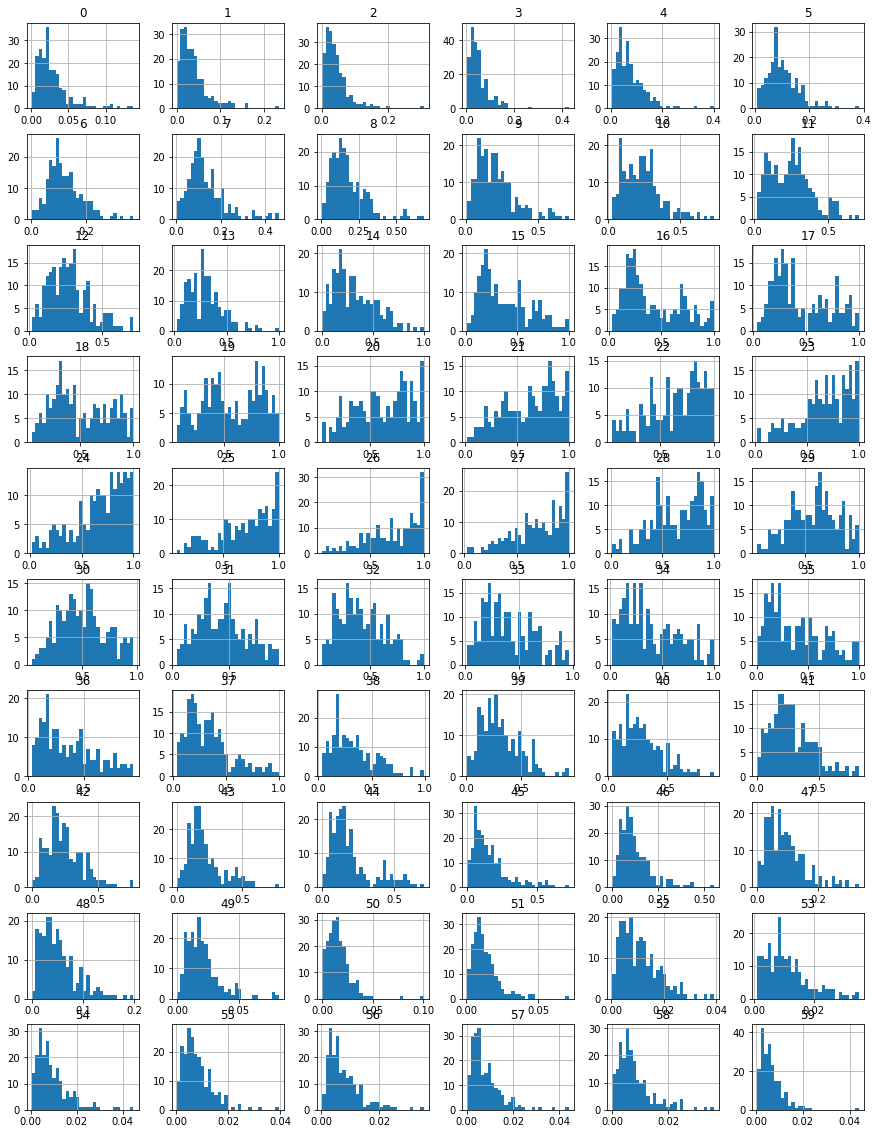

In [12]:
data.hist(figsize=(15,20),grid=True,layout=(10,6),bins=30)

Data seems to be heavily skewed. Let's find the skew values for the dataset

In [13]:
skew_values=pd.DataFrame(data.skew(axis=0,skipna=True),columns=['Skewness']).sort_values(by='Skewness',ascending=False)
skew_values

,Skewness
3,3.401697
59,2.775754
50,2.716060
2,2.652518
1,2.155644
0,2.131088
57,2.098330
51,2.093976
4,2.018141
46,1.790155


In [14]:
x=data.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [15]:
y=data[60]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [16]:
#checking for outliers
from scipy.stats import zscore
z_score=zscore(x)
z_score

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [17]:
x_new=x.loc[(abs(z_score)<3).all(axis=1)]
x_new

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [18]:
print(x.shape)
print(x_new.shape)

(208, 60)
(168, 60)


In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [20]:
#PCA to reduce the attribute count
from sklearn.decomposition import PCA
pca=PCA(10)
x_pca=pca.fit_transform(x_ss)
x_pca

array([[ 1.92116817, -1.37089312, -1.66647597, ..., -1.58126426,
         0.33541766, -1.02806487],
       [-0.48012458,  7.58638801, -1.27573428, ...,  1.51706129,
         0.30793259, -1.34188186],
       [ 3.8592282 ,  6.43986016, -0.03063464, ..., -1.49592917,
        -1.15245886, -1.00602971],
       ...,
       [-2.29321041, -2.75544556,  2.38846736, ..., -1.61920241,
         0.31778913, -0.39425184],
       [-3.11446433, -1.85054952,  2.42048603, ..., -0.36409895,
         0.53647566,  0.4574367 ],
       [-3.23862419, -2.27709396,  1.70612762, ..., -0.62571849,
        -0.55361493,  0.58836411]])

In [21]:
new_x=pd.DataFrame(data=x_pca)
new_x

,0,1,2,3,4,5,6,7,8,9
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594
...,...,...,...,...,...,...,...,...,...,...
203,-1.207653,-0.968174,3.116148,-0.212490,2.306835,1.151569,0.010206,-1.606494,0.587992,-2.089473
204,-2.971439,-2.753492,2.500966,0.478754,2.157206,0.928558,-0.738412,-0.105210,-0.748383,-0.255461
205,-2.293210,-2.755446,2.388467,0.130616,2.759021,1.049497,-0.449578,-1.619202,0.317789,-0.394252
206,-3.114464,-1.850550,2.420486,0.382211,1.658317,0.917819,1.078272,-0.364099,0.536476,0.457437


In [22]:
new_x.shape

(208, 10)

In [23]:
y.shape

(208,)

In [24]:
y=pd.DataFrame(data=y)
#new_y=y.reshape(-1,1)
y.shape

(208, 1)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_y=le.fit_transform(y)
new_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
new_y.shape

(208,)

In [27]:
new_y=new_y.reshape(-1,1)

In [28]:
new_y.shape

(208, 1)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,precision_score

In [30]:
def max_f1_score(lreg,new_x,new_y):
    max_score=0
    for r_state in range(42,201):
        x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,random_state=r_state,test_size=0.20)
        lreg.fit(x_train,y_train)
        y_pred=lreg.predict(x_test)
        f1score=f1_score(y_test,y_pred)
        print('f1_score for',r_state,'is',f1score)
        if(f1score>max_score):
            max_score=f1score
            final_r_state=r_state
    print('final f1_score is',max_score,'for r state', final_r_state)
    return final_r_state

In [31]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
r_state=max_f1_score(lreg,new_x,new_y)

f1_score for 42 is 0.6875
f1_score for 43 is 0.7906976744186046
f1_score for 44 is 0.6666666666666667
f1_score for 45 is 0.8444444444444444
f1_score for 46 is 0.7916666666666666
f1_score for 47 is 0.830188679245283
f1_score for 48 is 0.8205128205128205
f1_score for 49 is 0.65
f1_score for 50 is 0.7272727272727272
f1_score for 51 is 0.8235294117647058
f1_score for 52 is 0.8636363636363636
f1_score for 53 is 0.6451612903225806
f1_score for 54 is 0.6875
f1_score for 55 is 0.8000000000000002
f1_score for 56 is 0.7692307692307692
f1_score for 57 is 0.7272727272727273
f1_score for 58 is 0.7428571428571429
f1_score for 59 is 0.6666666666666667
f1_score for 60 is 0.8095238095238095
f1_score for 61 is 0.7222222222222222
f1_score for 62 is 0.9199999999999999
f1_score for 63 is 0.8148148148148148
f1_score for 64 is 0.7500000000000001
f1_score for 65 is 0.8148148148148148
f1_score for 66 is 0.7272727272727272
f1_score for 67 is 0.8571428571428571
f1_score for 68 is 0.7272727272727272
f1_score for 

MAX f1 SCORE from 42 to 200 is 0.92 for random_state of 162

In [32]:
x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.20,random_state=162)
print('x_train shape =',x_train.shape)
print('y_train shape =',y_train.shape)
print('x_test shape =',x_test.shape)
print('y_test shape =',y_test.shape)

x_train shape = (166, 10)
y_train shape = (166, 1)
x_test shape = (42, 10)
y_test shape = (42, 1)


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neighbors={'n_neighbors':range(1,30)}
knc=KNeighborsClassifier()
bknc=GridSearchCV(knc,neighbors,cv=10)
bknc.fit(x_train,y_train)
bknc.best_params_

C:\Users\Juliya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 5}

KNC n_neighbors best value is at 5

In [35]:
from sklearn.svm import SVC
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
svc=SVC()
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

C:\Users\Juliya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'kernel': 'rbf'}

SVC best parameters are at C:1 for rbf kernel

In [36]:
from sklearn.tree import DecisionTreeClassifier
criterion = {'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

C:\Users\Juliya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy'}

DTC criterion is best for entropy

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_parameters={'n_estimators':range(50,251)} #{learning_rate:[0.001,0.01,0.1,1.0]}
ad=AdaBoostClassifier()
bad=GridSearchCV(ad,ada_parameters)
bad.fit(x_train,y_train)
bad.best_params_

C:\Users\Juliya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 216}

AdaBoostClassifier is best when n_estimator is 216

In [38]:
def models(model,aScore,f1Score):
    for i in model:
        cls=i
        cls.fit(x_train,y_train)
        cls_pred=cls.predict(x_test)
        a_score=accuracy_score(y_test,cls_pred)
        aScore.append(a_score)
        c_matrix=confusion_matrix(y_test,cls_pred)
        c_report=classification_report(y_test,cls_pred)
        f1=f1_score(y_test,cls_pred)
        f1Score.append(f1)
        print(cls,'\n\nAccuracy Score = ',a_score,'\n\nClassification Matrix:',c_matrix,'\n\nClassification Report =\n',c_report,'\n\nF1 Sore = ',f1)
        print('\n**************************************************************************\n')
    return aScore,f1Score

In [39]:
knc_params={'n_neighbors':5}
svc_params={'kernel':'rbf','C':1}
dtc_params={'criterion':'entropy'}
ada_params={'n_estimators':216}
model=[LogisticRegression(),SVC(**svc_params),KNeighborsClassifier(**knc_params),DecisionTreeClassifier(**dtc_params),AdaBoostClassifier(**ada_params)]

In [40]:
aScore,f1Score=[],[]
models(model,aScore,f1Score)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Accuracy Score =  0.9047619047619048 

Classification Matrix: [[15  4]
 [ 0 23]] 

Classification Report =
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.85      1.00      0.92        23

    accuracy                           0.90        42
   macro avg       0.93      0.89      0.90        42
weighted avg       0.92      0.90      0.90        42
 

F1 Sore =  0.92

**************************************************************************

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', 

([0.9047619047619048,
  0.9285714285714286,
  0.8809523809523809,
  0.9047619047619048,
  0.9047619047619048],
 [0.92,
  0.9333333333333332,
  0.8979591836734695,
  0.9166666666666666,
  0.9166666666666666])

In [41]:
type(aScore)

list

In [42]:
type(f1Score)

list

In [43]:
df_model_names=['Logistic Regression','Support Vector Classifier','KNeighbors Classifier','Decision Tree Classifier','AdaBoost Classifier']
df=pd.DataFrame({'Model Name':df_model_names,'Accuracy Score':aScore,'F1 Score':f1Score})
#df_aScore=pd.DataFrame(data=aScore,columns=['Accuracy Score'],index=df_model_names)
#df_f1Score=pd.DataFrame(data=f1Score,columns=['F1 Score'],index=df_model_names)
#df=pd.concat([df_aScore,df_f1Score],axis=1)
df

,Model Name,Accuracy Score,F1 Score
0,Logistic Regression,0.904762,0.920000
1,Support Vector Classifier,0.928571,0.933333
2,KNeighbors Classifier,0.880952,0.897959
3,Decision Tree Classifier,0.904762,0.916667
4,AdaBoost Classifier,0.904762,0.916667


In [47]:
from joblib import dump #from joblib import load > to load .pkl file

In [48]:
#save the model to pickle file
joblib.dump(SVC(**svc_params),'SVC_Sonar_Dataset.pkl')

['SVC_Sonar_Dataset.pkl']